In [1]:
from sklearn import tree
from pandas import read_csv
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=read_csv("Travel.csv")

In [2]:
df

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


<function matplotlib.pyplot.show(close=None, block=None)>

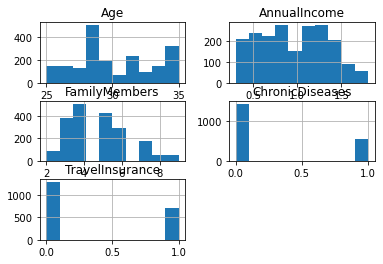

In [3]:
df.hist()
plt.show

In [4]:
features=['Age', 'AnnualIncome', 'FamilyMembers','ChronicDiseases']
X=df[features]
y=df['TravelInsurance']
print(X)
print(y)

      Age  AnnualIncome  FamilyMembers  ChronicDiseases
0      31        400000              6                1
1      31       1250000              7                0
2      34        500000              4                1
3      28        700000              3                1
4      28        700000              8                1
...   ...           ...            ...              ...
1982   33       1500000              4                0
1983   28       1750000              5                1
1984   28       1150000              6                1
1985   34       1000000              6                0
1986   34        500000              4                0

[1987 rows x 4 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1982    1
1983    0
1984    0
1985    1
1986    0
Name: TravelInsurance, Length: 1987, dtype: int64


In [5]:
inputs=df.drop('TravelInsurance',axis='columns')
target=df['TravelInsurance']

In [6]:
from sklearn.preprocessing import LabelEncoder
le_EmploymentType=LabelEncoder()
le_GraduateOrNot=LabelEncoder()
le_FrequentFlyer=LabelEncoder()
le_EverTravelledAbroad=LabelEncoder()
inputs['EmploymentType_n']=le_EmploymentType.fit_transform(inputs['EmploymentType'])
inputs['GraduateOrNot_n']=le_GraduateOrNot.fit_transform(inputs['GraduateOrNot'])
inputs['FrequentFlyer_n']=le_FrequentFlyer.fit_transform(inputs['FrequentFlyer'])
inputs['EverTravelledAbroad_n']=le_EverTravelledAbroad.fit_transform(inputs['EverTravelledAbroad'])
inputs.head()

,Age,EmploymentType,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n
0,31,Government Sector,Yes,400000,6,1,No,No,0,1,0,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,1,1,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,1,0,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,1,1,0,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,1,1,1,0


In [7]:
inputs_n=inputs.drop(['EmploymentType','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'],axis='columns')
inputs_n

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,EmploymentType_n,GraduateOrNot_n,FrequentFlyer_n,EverTravelledAbroad_n
0,31,400000,6,1,0,1,0,0
1,31,1250000,7,0,1,1,0,0
2,34,500000,4,1,1,1,0,0
3,28,700000,3,1,1,1,0,0
4,28,700000,8,1,1,1,1,0
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1
1983,28,1750000,5,1,1,1,0,1
1984,28,1150000,6,1,1,1,0,0
1985,34,1000000,6,0,1,1,1,1


In [8]:
### SVM CLASSIFICATION

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [10]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)

SVC()

In [11]:
y_pred=model.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 

In [12]:
model.fit(X_train,y_train)

SVC()

In [13]:
model.score(X_test,y_test)

0.8023450586264657

In [14]:
#importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is  0.10830105566947679
mean_sqrd_error is== 0.19765494137353434
root_mean_squared error of is== 0.44458400935428877
